<a href="https://colab.research.google.com/github/baepigyu/AI-Deep-Learning-Class/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [3]:
model = keras.Sequential()

model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))

In [4]:
model.build(input_shape = (None,3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.00101462, -0.10551664, -0.1747173 , -0.24972841,  0.2554515 ,
          0.0675633 ,  0.07938927, -0.12192926, -0.23497733,  0.01965252,
         -0.0888598 , -0.05086209,  0.06712124,  0.10903463,  0.29204148,
          0.05848935,  0.10344365,  0.2628432 ,  0.1257168 , -0.04198405,
          0.05253419, -0.01186585,  0.11843482,  0.26984727,  0.07589862,
          0.25220472,  0.1598492 ,  0.25240833,  0.06169868,  0.26620644,
          0.16064808,  0.06807864, -0.1820817 , -0.07987002,  0.07957479,
          0.28752005,  0.26828837,  0.26312542,  0.11546403,  0.14429426,
         -0.21186362, -0.0058111 , -0.1387014 ,  0.25394756,  0.17606354,
          0.02030641,  0.12172177,  0.1310924 ,  0.27471983,  0.25635403,
          0.07278416, -0.2982513 ,  0.26127356,  0.08407053, -0.22737227,
          0.16322723,  0.21207881,  0.29490352, -0.05779456,  0.21567714,
          0.01122895, -0.14790565, -0.25812

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model = keras.Sequential(name = 'my_example_model')
model.add(layers.Dense(64,activation = 'relu', name = 'my_first_layer'))
model.add(layers.Dense(10,activation = 'softmax',name = 'my_last_layer'))
model.build((,3))
model.summary()

SyntaxError: invalid syntax (<ipython-input-15-223aafcacb09>, line 4)

In [9]:
model.add(layers.Dense(10,activation = 'softmax'))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 1016 (3.97 KB)
Trainable params: 1016 (3.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
inputs = keras.Input(shape = (3,),name = 'my_input')
features = layers.Dense(64,activation = 'relu')(inputs)
outputs = layers.Dense(10,activation = 'softmax')(features)
model = keras.Model(inputs = inputs, outputs = outputs)

In [28]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape = (vocabulary_size,),name = 'title')
text_body = keras.Input(shape = (vocabulary_size,),name = 'text_body')
tags = keras.Input(shape = (num_tags,), name = 'tags')

features = layers.Concatenate()([title,text_body,tags])
features = layers.Dense(64,activation = 'relu')(features)
features = layers.Dense(36,activation = 'relu')(features)
features = layers.Dense(24,activation = 'relu')(features)

priority = layers.Dense(1,activation = 'sigmoid', name = 'priority')(features)
department = layers.Dense(num_departments, activation = 'softmax',name = 'department')(features)

model = keras.Model(inputs = [title,text_body,tags],outputs = [priority,department])

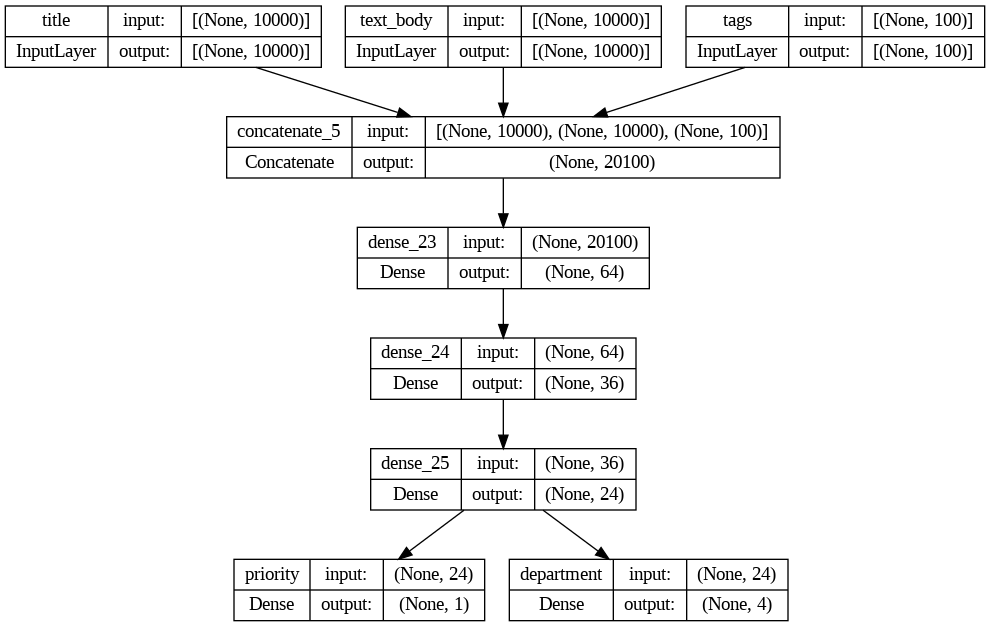

In [29]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [30]:

third = layers.Dense(3,activation = 'softmax')(model.layers[5].output)

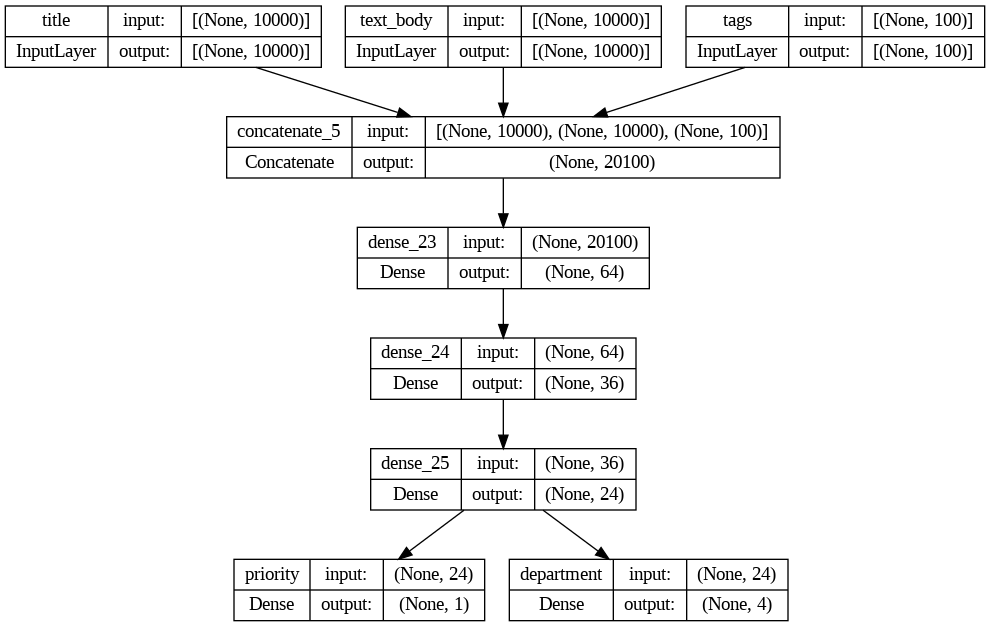

In [31]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [23]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape = (vocabulary_size,),name = 'title')
text_body = keras.Input(shape = (vocabulary_size,),name = 'text_body')
tags = keras.Input(shape = (num_tags,), name = 'tags')

features = layers.Concatenate()([title,text_body,tags])
features = layers.Dense(64,activation = 'relu')(features)
features = layers.Dense(36,activation = 'relu')(features)
third = layers.Dense(3,activation = 'softmax', name = 'third')(features)
features = layers.Dense(24,activation = 'relu')(features)



priority = layers.Dense(1,activation = 'sigmoid', name = 'priority')(features)
department = layers.Dense(num_departments, activation = 'softmax',name = 'department')(features)


model = keras.Model(inputs = [title,text_body,tags],outputs = [priority,department,third])

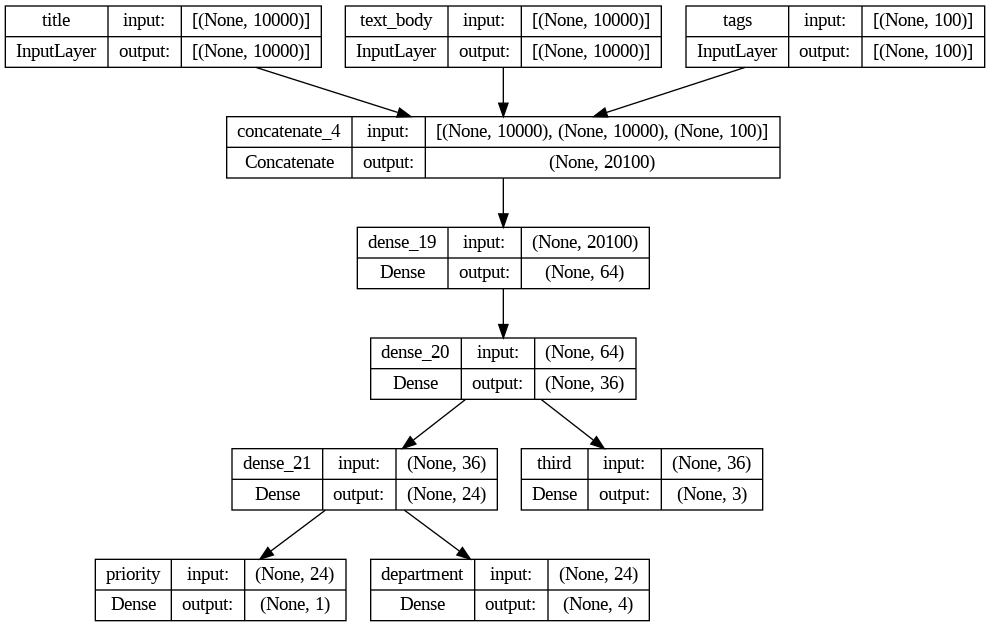

In [24]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [25]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))
diffifulty_data = np.random.randint(0,2,size = (num_samples,3))

In [ ]:
model.compile(optimizer = 'rmsprop',
              loass = ['binary_crossentropy','categorical_crossentropy',])

In [32]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    # Dropout을 이렇게 쓰는 구나
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", # labels 값이 5,0,4 등
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1563/1563 [==============================] - 8s 4ms/step - loss: 0.2933 - accuracy: 0.9132 - val_loss: 0.1485 - val_accuracy: 0.9561
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1610 - accuracy: 0.9534 - val_loss: 0.1117 - val_accuracy: 0.9688
Epoch 3/3
313/313 [==============================] - 1s 1ms/step


In [ ]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self,name = 'rmse', **kwargs):
        super().__init__(name = name, **kwargs)
        self.mse_sum = self.add_weights(name = 'mse_sum',initializer = 'zeros')
        self.total_samples = self.add_weight(
            name = 'total_samples'
        )

In [33]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor = 'val_accuracy',
        patience = 2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath = 'checkpoint_path.h5',
        monitor = 'val_loss',
        save_best_only = True
    )
]

model = get_mnist_model()
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit()

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>